In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
car=pd.read_csv('Car.csv',sep=',')

In [3]:
print(car.shape)
car.head()

(8128, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
car.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
car.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [7]:
#engine is null or not
car_engine=car['engine'].isnull()
car=car[~car_engine]
car.shape

(7907, 13)

In [8]:
car.rename(columns = {'max_power':'max_power(bph)','mileage':'mileage(kmpl)','engine':'engine(CC)'},inplace = True)
car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bph),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


In [9]:
#replace CC, kmpl,bhp in engine,mileage and maxpower values
car['mileage(kmpl)']=car['mileage(kmpl)'].str.replace(' kmpl','')
car['mileage(kmpl)']=car['mileage(kmpl)'].str.replace(' km/kg','')
car['engine(CC)']=car['engine(CC)'].str.replace(' CC','')
car['max_power(bph)']=car['max_power(bph)'].str.replace(' bhp','')
car.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(kmpl),engine(CC),max_power(bph),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5.0


In [10]:
car.dropna(axis=0,inplace=True)

In [13]:
#Change data type of columns
car['mileage(kmpl)']= car['mileage(kmpl)'].astype('float')
car['engine(CC)']=car['engine(CC)'].astype('int64')
car['max_power(bph)']=car['max_power(bph)'].astype('float')
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            7906 non-null   object 
 1   year            7906 non-null   int64  
 2   selling_price   7906 non-null   int64  
 3   km_driven       7906 non-null   int64  
 4   fuel            7906 non-null   object 
 5   seller_type     7906 non-null   object 
 6   transmission    7906 non-null   object 
 7   owner           7906 non-null   object 
 8   mileage(kmpl)   7906 non-null   float64
 9   engine(CC)      7906 non-null   int64  
 10  max_power(bph)  7906 non-null   float64
 11  torque          7906 non-null   object 
 12  seats           7906 non-null   float64
dtypes: float64(3), int64(4), object(6)
memory usage: 864.7+ KB


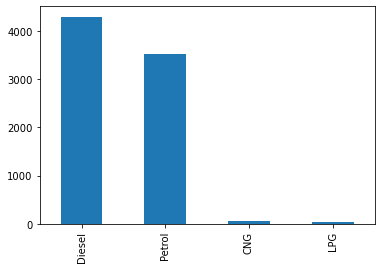

In [14]:
car.fuel.value_counts().plot(kind='bar')
plt.show()

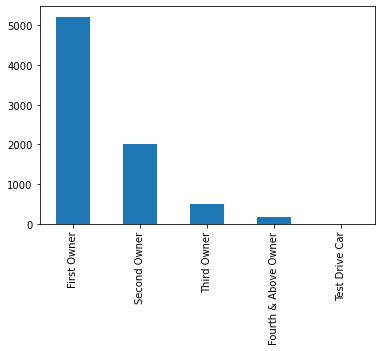

In [15]:
car.owner.value_counts().plot(kind='bar')
plt.show()

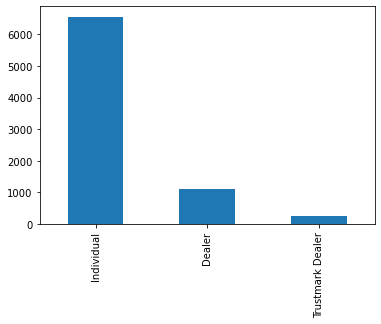

In [16]:
car.seller_type.value_counts().plot(kind='bar')
plt.show()

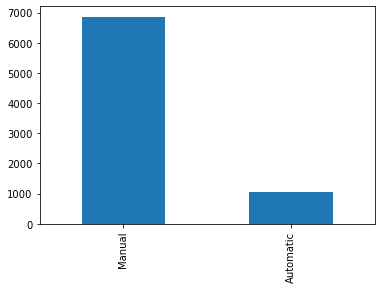

In [17]:
car.transmission.value_counts().plot(kind='bar')
plt.show()

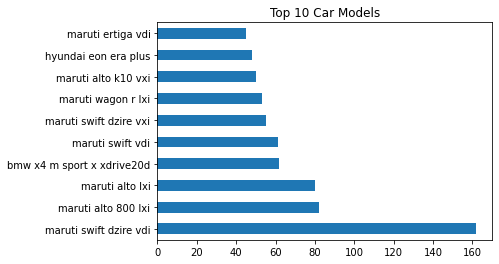

In [18]:
car.name.str.lower().value_counts().nlargest(n=10).plot(kind='barh',title='Top 10 Car Models')
plt.show()

<AxesSubplot:ylabel='bin'>

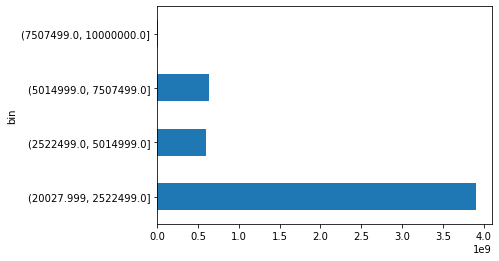

In [22]:
_, edges = pd.cut(car.selling_price, bins=4, retbins=True)
edges = [int(x) for x in edges]
car['bin'] = pd.cut(car.selling_price, bins=edges, include_lowest=True)
car.groupby('bin')['selling_price'].sum().plot(kind='barh')